In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

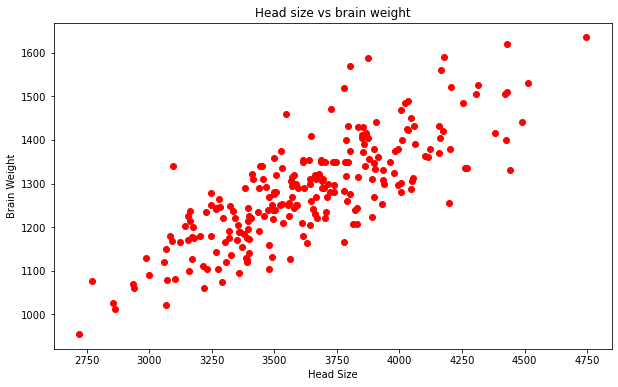

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='r')
plt.title("Head size vs brain weight")
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [11]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer/denom

In [12]:
slope

0.26342933948939945

In [13]:
inter = mean_y - slope * mean_x

In [14]:
inter

325.57342104944223

In [15]:
from scipy.stats import linregress

In [16]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [17]:
predictions = []
for i in range(len(X)):
    y_pred = slope * X[i] + inter
    predictions.append(int(y_pred))

In [18]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [20]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

In [22]:
output_df = pd.DataFrame({'actual_y' : y, 'pred_y' : predictions})

In [23]:
output_df

,actual_y,pred_y
0,1530,1514
1,1297,1310
2,1335,1448
3,1282,1320
4,1590,1425
...,...,...
232,1110,1172
233,1215,1219
234,1104,1177
235,1170,1208


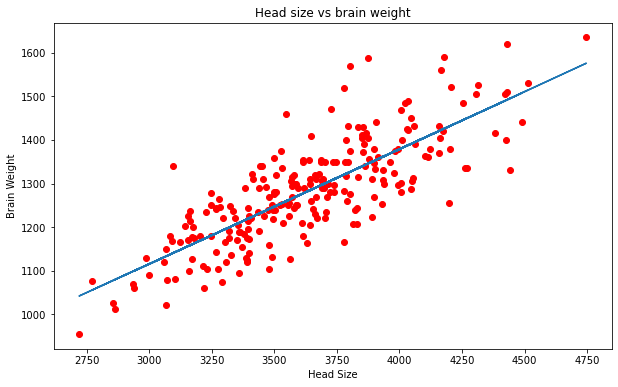

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='r')
plt.plot(X,predictions)
plt.title("Head size vs brain weight")
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [25]:
n = len(X)
error = 0

for i in range(n):
    error += (predictions[i] - y[i]) ** 2

error = error/n

In [27]:
print("MSE",error)

MSE 5202.9029535864975


In [29]:
np.sqrt(error)

72.13115106239812